Gradient estimates of velocity, density, and buoyancy via least sqaures approximation for front datasets. Also estimates of submesoscale diagnostics (vorticity, divergence, strain, vertical velocity, frontogenetic tendency) 

### Import Packages 

In [1]:
# for local use 
import sys
sys.path.append("/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/ATOMIC_MesoscaleFront/utilities")
from Utils import *
from ATOMIC_Utils import *
from Gradient_LeastSquares import *

In [2]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import cmocean as cm
import pandas as pd
import sys
# sys.path.append("/home/mlb15109/Research/ATOMIC/github_repos/ATOMIC_MesoscaleFront/utilities")
# from Utils import *
# from ATOMIC_Utils import *
# from Gradient_LeastSquares import *
from matplotlib.colors import LogNorm

import seawater as sw
from sklearn.metrics import pairwise_distances
from scipy import stats
from pycurrents.adcp.rdiraw import Multiread
from sklearn.metrics.pairwise import nan_euclidean_distances

### Load Data

In [3]:
coefs = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs.nc')
coefs_nonadcp = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/coefs_nonadcp.nc')
subset = xr.open_dataset('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/MergedDS_FrontFinder.nc')


In [4]:
import glob

# absolute path to search all text files inside a specific folder
path = '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/*.nc'
print(glob.glob(path))

['/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds67.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds36.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds53.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds2.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds43.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds12.nc', '/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/ds

In [5]:
filelist = glob.glob(path)

In [6]:
# sorts files in order from 1,2,3,4,.... instead of 0,1,10,11,12,...2,20,21,....
from natsort import natsorted 
filelist = natsorted(filelist)

In [8]:
# create list of datasets 
dslist_subset = []
for i in range(len(filelist)):
    dslist_subset.append(xr.open_dataset(filelist[i]))




In [10]:
# define time interval and # of data points needed for  least squares
# should I be changing this for the front sections??? 
interval = 15
k = 3 

In [11]:
# crop all datasets to 50 m 
for i in range(len(dslist_subset)):
    dslist_subset[i] = dslist_subset[i].isel(depth=slice(0,24))

#### nonadcp gradients 

In [12]:
# calculate coefs for all the front sections 
# calculate density coefficients 
coefs_density = []
for ds in range(len(dslist_subset)):
    coefs_density.append(Coefs_Dataset(subset=dslist_subset[ds],
                         variable='sigma0',
                         var1 = 'rho_mean',
                         var2 = 'rhox',
                         var3 = 'rhoy',
                         interval = interval,
                         k=k,
                         j=False))

In [13]:
# get coefs for b 
# Already ran this so just open saved dataset

coefs_b = []
for ds in range(len(dslist_subset)):
    coefs_b.append(Coefs_Dataset(subset=dslist_subset[ds],
                         variable='b',
                         var1 = 'b_mean',
                         var2 = 'bx',
                         var3 = 'by',
                         interval = interval,
                         k=k,
                         j=False))

In [14]:
# make list of merged coefs (density + buoyancy) 
coefs_nonadcp = []
for ds in range(len(dslist_subset)):
    coefs_nonadcp.append(xr.merge([coefs_density[ds],coefs_b[ds]]))
    # coefs_nonadcp[ds] = coefs_nonadcp[ds].reset_coords()

In [16]:
# for i in range(len(coefs_nonadcp)):
#     coefs_nonadcp[i].to_netcdf('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/coefs_nonadcp/ds{}.nc'.format(i))
    

In [17]:
# concatenate togther - this keeps all times seperate which is what I think I want? 
coefs_nonadcp_merged = xr.concat(coefs_nonadcp,dim='time')

#### adcp gradients 

In [19]:
# #Get the coefficients for u and v gradients 
coefs_u_list = []
for ds in range(len(dslist_subset)):
    print([ds])
    coefs_u = []
    for j in range(len(dslist_subset[ds].depth)):
        subset1 = dslist_subset[ds].isel(depth=j)
        coefs_u.append(Coefs_Dataset(subset=subset1,
                         variable='u',
                         var1 = 'u_mean',
                         var2 = 'ux',
                         var3 = 'uy',
                         interval = interval,
                         k = k,
                         j=True))
    coefs_u = xr.merge(coefs_u)
    coefs_u_list.append(coefs_u)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]


In [20]:
# #Get the coefficients for u and v gradients 
coefs_v_list = []
for ds in range(len(dslist_subset)):
    print([ds])
    coefs_v = []
    for j in range(len(dslist_subset[ds].depth)):
        subset1 = dslist_subset[ds].isel(depth=j)
        coefs_v.append(Coefs_Dataset(subset=subset1,
                         variable='v',
                         var1 = 'v_mean',
                         var2 = 'vx',
                         var3 = 'vy',
                         interval = interval,
                         k = k,
                         j=True))
    coefs_v = xr.merge(coefs_v)
    coefs_v_list.append(coefs_v)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]


In [21]:
#Get the coefficients for u and v gradients 
coefs_e_list = []
for ds in range(len(dslist_subset)):
    print([ds])
    coefs_e = []
    for j in range(len(dslist_subset[ds].depth)):
        subset1 = dslist_subset[ds].isel(depth=j)
        coefs_e.append(Coefs_Dataset_Error(subset=subset1,
                         variable='e',
                         var1 = 'e_mean',
                         var2 = 'ex',
                         var3 = 'ey',
                         interval = interval,
                         k = k,
                         j=True))
    coefs_e = xr.merge(coefs_e)
    coefs_e_list.append(coefs_e)

[0]
[1]
[2]
[3]
[4]
[5]
[6]
[7]
[8]
[9]
[10]
[11]
[12]
[13]
[14]
[15]
[16]
[17]
[18]
[19]
[20]
[21]
[22]
[23]
[24]
[25]
[26]
[27]
[28]
[29]
[30]
[31]
[32]
[33]
[34]
[35]
[36]
[37]
[38]
[39]
[40]
[41]
[42]
[43]
[44]
[45]
[46]
[47]
[48]
[49]
[50]
[51]
[52]
[53]
[54]
[55]
[56]
[57]
[58]
[59]
[60]
[61]
[62]
[63]
[64]
[65]
[66]
[67]
[68]
[69]
[70]
[71]
[72]
[73]
[74]
[75]
[76]
[77]
[78]
[79]
[80]
[81]


In [22]:
# merge coef datasets together for each front 
coefs_adcp = []
for ds in range(len(dslist_subset)):
    coefs_adcp.append(xr.merge([coefs_u_list[ds],coefs_v_list[ds],coefs_e_list[ds]]))

### Calculate along track distance, vorticity, divergence, and strain rate 

In [24]:
dslist_subset[0].distance_cum.values

array([0. , 0.5, 1. , 1.5, 2. , 2.5, 3. , 3.5, 4. , 4.5, 5. , 5.5, 6. ,
       6.5, 7. , 7.5, 8. , 8.5, 9. , 9.5])

In [25]:
# calculate distance and add to dataset 

for ds in range(len(coefs_adcp)):
    coefs_adcp[ds]['distance_cum'] = dslist_subset[ds]['distance_cum']
    coefs_nonadcp[ds]['distance_cum'] = dslist_subset[ds]['distance_cum']


In [27]:
for ds in range(len(coefs_adcp)):


    # calculate normalized vorticity 
    vorticity = (coefs_adcp[ds]['vx']-coefs_adcp[ds]['uy'])/gsw.f(coefs_adcp[ds]['latitude'])
    
    # calculate normalized divergence
    div = (coefs_adcp[ds]['ux']+coefs_adcp[ds]['vy'])/gsw.f(coefs_adcp[ds]['latitude'])
    
    # calculate strain rate
    strain = ((((coefs_adcp[ds]['ux']-coefs_adcp[ds]['vy'])**2)+((coefs_adcp[ds]['uy']+coefs_adcp[ds]['vx'])**2))**0.5)/gsw.f(coefs_adcp[ds]['latitude'])
    
    # add variables to dataset
    coefs_adcp[ds]['vort'] = vorticity
    coefs_adcp[ds]['div'] = div
    coefs_adcp[ds]['strain'] = strain

### Calculate vertical velocity from divergence

In [28]:
# define a non-normalized divergence to calculate vertical velocity with 
div_nonnorm = []
for i in range(len(coefs_adcp)):
    div_nonnorm.append(coefs_adcp[i].div * gsw.f(coefs_adcp[i]['latitude']))

In [29]:
# calculate vertical velocity from divergence 
for i in range(len(coefs_adcp)):
    w = []
    for j in range(len(div_nonnorm[i].depth)):
        w.append(-np.trapz(div_nonnorm[i].isel(depth=slice(0,j)),axis=0,dx=-2))
    
    coefs_adcp[i]['w'] = (['depth','time'],w)

### Calculate frontogenic tendency 

F = −(uxb2x + vyb2y) − (vx + uy)bxby 

In [30]:
# calculate frontogenic tendency 

F = []
for i in range(len(coefs_adcp)):
    F.append(-(coefs_adcp[i].ux * (coefs_nonadcp[i].bx)**2 + coefs_adcp[i].vy * (coefs_nonadcp[i].by)**2) - (coefs_adcp[i].vx + coefs_adcp[i].uy)*coefs_nonadcp[i].bx*coefs_nonadcp[i].by)


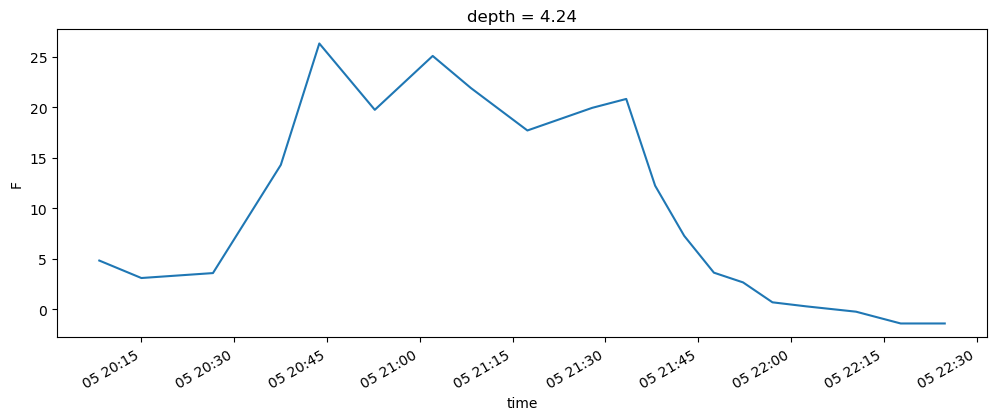

In [35]:
coefs_adcp[18].F.isel(depth=0).plot(figsize=(12,4))

In [36]:
# normalize F 

for i in range(len(coefs_adcp)):

    rho_mag = np.sqrt(coefs_nonadcp[i].rhox**2 + coefs_nonadcp[i].rhoy**2)
    coefs_nonadcp[i]['rho_mag'] = rho_mag
    
    rho_angle = np.arctan2(coefs_nonadcp[i].rhoy,coefs_nonadcp[i].rhox)
    rho_angle = (rho_angle*180)/np.pi
    coefs_nonadcp[i]['rho_angle'] = rho_angle
    
    f = gsw.f(coefs_adcp[i]['latitude']).mean()
    g = 9.81
    rho0 = 1025
    gradrho_std = np.std(rho_mag)
    
    F2 = (g**2/rho0**2) * (gsw.f(coefs_adcp[i]['latitude'])) * (gradrho_std)**2
    
    coefs_adcp[i]['F'] = F[i] / F2

In [39]:
# for i in range(len(coefs_adcp)):
#     coefs_adcp[i].to_netcdf('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/coefs/ds{}.nc'.format(i))
    

In [40]:
coefs = xr.merge(coefs_adcp)

In [52]:
# coefs.to_netcdf('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/data/FrontFinder/90_100_Percentile_Interp05km/coefs/coefs_merged.nc')

### Plots

Text(0, 0.5, 'Probability Distribution Function')

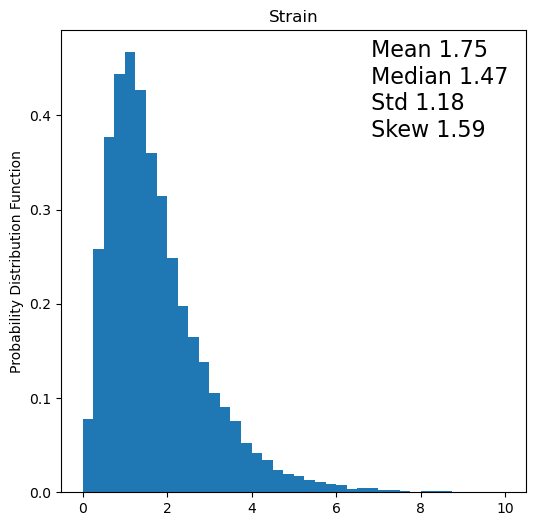

In [41]:

var = coefs.strain.values.flatten()
# var = var * 100
title = 'Strain'
bmin = -6
bmax = 10
dbins = 0.25

# bmin = -20
# bmax = 20
# dbins = 0.5

fig = plt.figure(figsize=(6,6))
ax0 = fig.add_subplot(111)



img0 = ax0.hist(var,density=True,bins=np.arange(0,bmax+dbins,dbins))


plt.text(.65,0.87,
        (f' Mean {get_stats(var)[0]} \n Median {get_stats(var)[1]} \n Std {get_stats(var)[2]} \n Skew {get_stats(var)[3]}'.format()),
ha='left',va='center',transform=ax0.transAxes,fontsize=16)

ax0.set_title(title)
ax0.set_ylabel('Probability Distribution Function')

# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/PDF_w.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)

In [42]:
F_fronts = []
Div_fronts = []
for i in range(len(coefs_adcp)):
    F_fronts.append(coefs_adcp[i].isel(depth=0).F.mean())
    Div_fronts.append(coefs_adcp[i].isel(depth=0).div.mean())

In [43]:
len(Div_fronts)

82

(-100.0, 300.0)

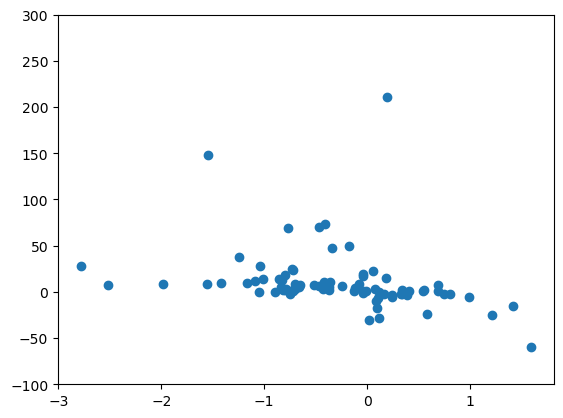

In [48]:

plt.scatter(Div_fronts,F_fronts)
plt.ylim(-100,300)

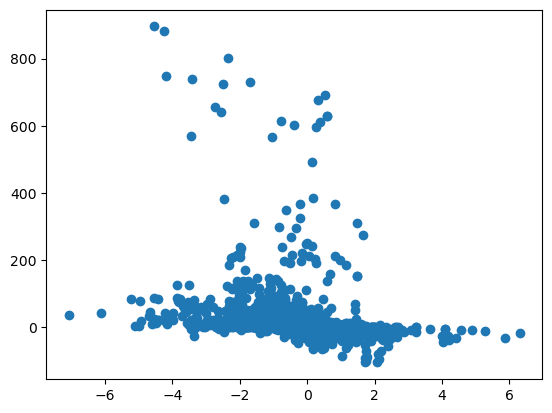

In [45]:
plt.scatter(coefs.isel(depth=0).div,coefs.isel(depth=0).F)

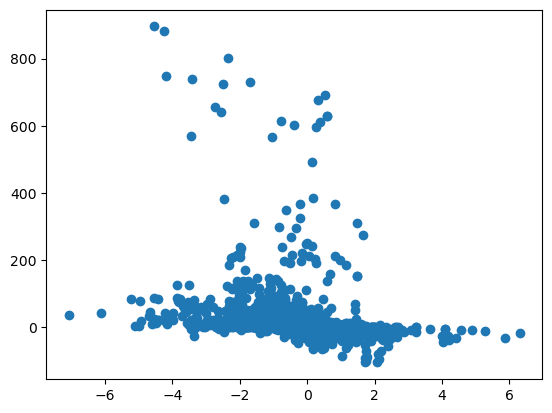

In [47]:
plt.scatter(coefs.isel(depth=0).div,coefs.isel(depth=0).F)

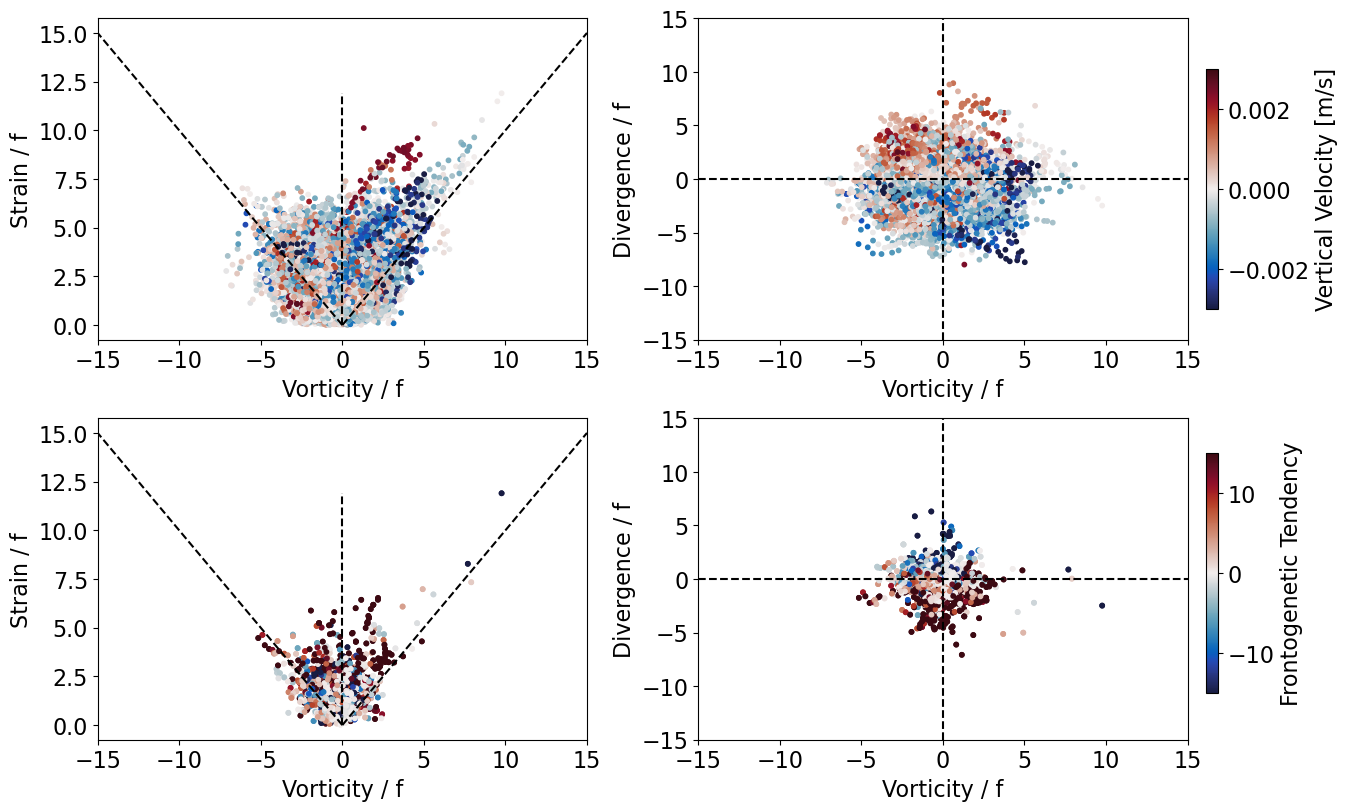

In [50]:
# subplots of:
# 1. strain vs. vorticity colored with vertical velocity 
# 2. divergence vs. vorticity colored with vertical velocity 
# 3. strain vs. vorticity colored with frontogenetic tendency 
# 4. divergence vs. vorticity colored with frontogenetic tendency 

plt.rcParams.update({'font.size': 16})
xmin = -5 
xmax = 5
subset = coefs.isel(depth=slice(0,24))
fig, ax = plt.subplots(nrows=2, ncols=2, figsize=(12,8),constrained_layout=True)
max = 15
min = -15

#parameters
kw = {'cmap':cmocean.cm.balance,
      'vmin':-0.003,
      'vmax':0.003}

# first subplot 
ax[0,0].scatter(subset.vort,subset.strain,c=subset.w,s=10,**kw)
ax[0,0].set_xlabel('Vorticity / f')
ax[0,0].set_ylabel('Strain / f')
ax[0,0].set_xlim(min,max)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[0,0].plot([0, max], [0, max], 'k',linestyle='dashed')
ax[0,0].plot([0, min], [0, -min], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[0,0].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

#second subplot
im = ax[0,1].scatter(subset.vort,subset.div,c=subset.w,s=10,**kw)
ax[0,1].set_xlabel('Vorticity / f')
ax[0,1].set_ylabel('Divergence / f')
ax[0,1].set_ylim(min,max)
ax[0,1].set_xlim(min,max)
cbar_ax = fig.add_axes([1, 0.62, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Vertical Velocity [m/s]')
ax[0,1].plot([min,max],[0,0],'--',color='k')
ax[0,1].plot([0,0],[min,max],'--',color='k')

kw = {'cmap':cmocean.cm.balance,'vmin':-15,'vmax':15}
# third subplot
ax[1,0].scatter(subset.isel(depth=0).vort,subset.isel(depth=0).strain,c=subset.isel(depth=0).F,s=10,**kw)
ax[1,0].scatter(subset.isel(depth=0).vort,subset.isel(depth=0).strain,c=subset.isel(depth=0).F,s=10,**kw)
ax[1,0].set_xlabel('Vorticity / f')
ax[1,0].set_ylabel('Strain / f')
ax[1,0].set_xlim(min,max)

# plot 1:1 lines 
x = subset.vort
y = subset.strain
ax[1,0].plot([0, max], [0, max], 'k',linestyle='dashed')
ax[1,0].plot([0, min], [0, -min], 'k',linestyle='dashed')
#plot vertical line at zero vorticity
ax[1,0].vlines(x=0,ymax=y.max(),ymin=0,color='k',linestyle='dashed')

# fourth subplot
im = ax[1,1].scatter(subset.isel(depth=0).vort,subset.isel(depth=0).div,c=subset.isel(depth=0).F,s=10,**kw)
im = ax[1,1].scatter(subset.isel(depth=0).vort,subset.isel(depth=0).div,c=subset.isel(depth=0).F,s=10,**kw)
ax[1,1].set_xlabel('Vorticity / f')
ax[1,1].set_ylabel('Divergence / f')
ax[1,1].set_ylim(min,max)
ax[1,1].set_xlim(min,max)
cbar_ax = fig.add_axes([1, 0.14, 0.010, 0.3])
fig.colorbar(im, cax=cbar_ax,label=r'Frontogenetic Tendency')
ax[1,1].plot([min,max],[0,0],'--',color='k')
ax[1,1].plot([0,0],[min,max],'--',color='k')

# plt.savefig('/shared/oceandynamics/Data/Atomic/DataMackenzie/FrontCaseStudy1/data/scatterplots_front1.jpeg',
#             dpi=200,bbox_inches='tight')
# plt.savefig('/Users/mackenzie/Documents/Research/Cesar_Rocha/notebooks/TropicalSubmesoscaleDynamics/figures/FullDS_Scatterplots_upper50m.png',
#             dpi=400,
#             bbox_inches='tight',
#             transparent=True)